In [2]:
!pip install pymongo
!pip install pandas
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from pymongo import MongoClient
from pandas import DataFrame


In [4]:
client = MongoClient("0.0.0.0", 27017)


In [5]:
my_db = client.database
collection = my_db.hosts

In [6]:
cursor = collection.aggregate([{"$group": {"_id": "$os", "count": {"$sum": 1}}}])
list_cur = list(cursor)
df = DataFrame(list_cur)
print(df)

                                                 _id  count
0  Microsoft Windows Server 2019 Datacenter 10.0....      1
1                                     Amazon Linux 2      6


<Axes: xlabel='_id'>

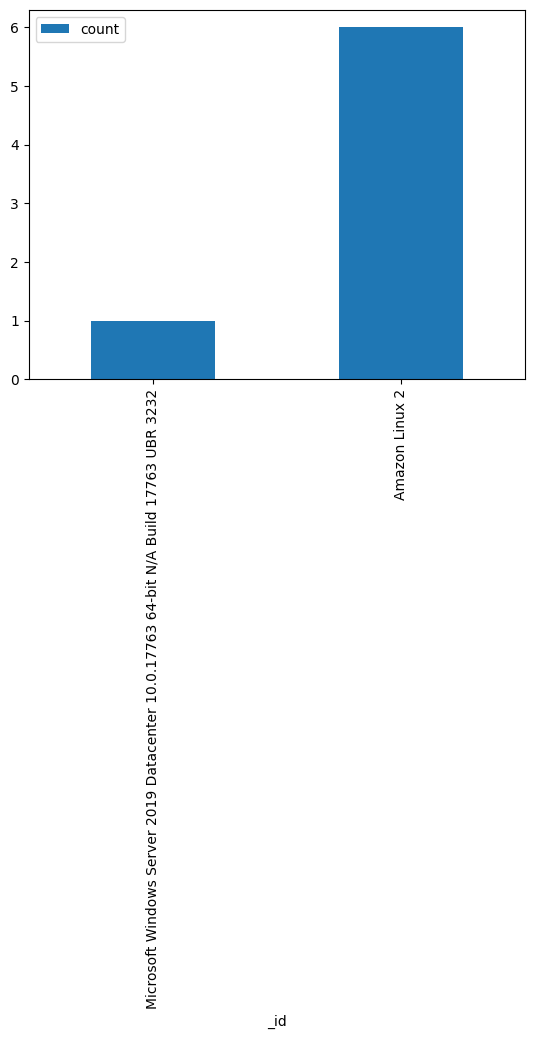

In [7]:
df.plot.bar(x="_id", y="count")

In [8]:
cursor = collection.aggregate([
  { "$unwind": "$device_policies" },
  { "$group": { "_id": "$device_policies.policy_name", "count": { "$sum": { "$cond": [{ "$eq": ["$device_policies.applied", True] }, 1, 0] } } } }
])

list_cur = list(cursor)
df = DataFrame(list_cur)
print(df)

               _id  count
0  remote_response      5
1       prevention      5
2    sensor_update      5
3    global_config      5


<Axes: xlabel='_id'>

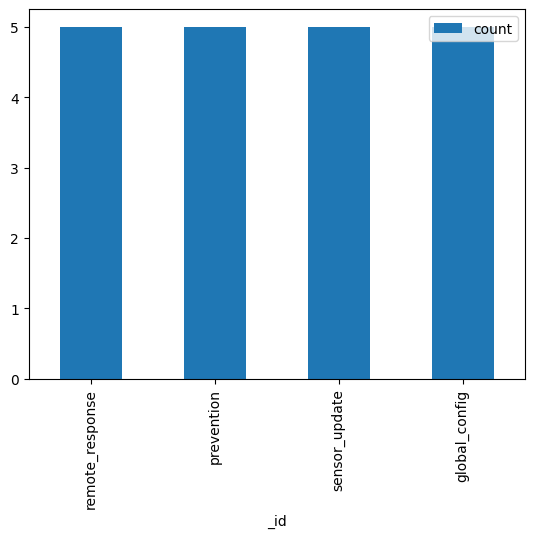

In [9]:
df.plot.bar(x="_id", y="count")